In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("config_output_0_bg/output.csv", index_col=False)

/var/folders/wy/6n8cc2zs28dgc3wfrp9t8x940000gn/T/ipykernel_69798/3492058307.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv("config_output_0_bg/output.csv", index_col=False)


In [4]:
df = df.dropna()
df.head(20)

,Sim,Time step,Color,X,Y,Reward,Move,Color.1,X.1,Y.1,Reward.1,Move.1,
0,1,1,green,1,1,0,Go,red,2.0,1.0,0.0,Go,
1,1,2,green,1,2,-2,Lane,red,2.0,2.0,-2.0,Go,
2,1,3,green,2,2,-4,Go,red,2.0,3.0,-2.0,Go,
3,1,4,green,2,3,-4,Go,red,2.0,4.0,-2.0,Go,
4,1,5,green,2,4,-4,Go,red,2.0,5.0,-2.0,Go,
5,1,6,green,2,5,-4,Go,red,2.0,6.0,-2.0,Go,
6,1,7,green,2,6,-4,Go,red,2.0,7.0,-2.0,Go,
7,1,8,green,2,7,-4,Go,red,2.0,8.0,-2.0,Go,
8,1,9,green,2,8,-4,Go,red,2.0,9.0,-2.0,Exited,
10,2,1,green,1,1,0,Go,red,2.0,1.0,0.0,Go,


In [5]:
df = df.dropna()

In [6]:
df[' Time step'][2]

3

In [7]:
crashed_sim

NameError: name 'crashed_sim' is not defined

In [8]:
total_step = [0]*50
green_lane_time = [0]*50
green_stop = [0]*50
red_lane_time = [0]*50
red_stop = [0]*50
crashed_sim = list()
green_reward = list()
red_reward = list()
for i in range(len(df)):
    sim = df['Sim'].to_list()[i] - 1
    if df[' Move'].to_list()[i] == ' Crashed':
        crashed_sim.append(sim)
    #if df[' X'].to_list()[i] != 4:
    #   if df[' Move'].to_list()[i] == ' Stop':
    #        green_early_stop[sim] += 1
    else:
        if df[' Move'].to_list()[i] == ' Lane':
            green_stop[sim] += 1 
            if green_lane_time[sim] == 0:
                green_lane_time[sim] = df[' Time step'].to_list()[i]
            
            
    if df[' Move'].to_list()[i] == ' Crashed' or df[' Move'].to_list()[i] == ' Exited':
        green_reward.append(df[' Reward'].to_list()[i])
        total_step[sim] = df[' Time step'].to_list()[i]
    if df[' Move.1'].to_list()[i] == ' Crashed' or df[' Move.1'].to_list()[i] == ' Exited':
        red_reward.append(df[' Reward.1'].to_list()[i])
        total_step[sim] = df[' Time step'].to_list()[i]
    
    
    #if df[' Y.1'].to_list()[i] != 4:
    #    if df[' Move.1'].to_list()[i] == ' Stop':
    #        red_early_stop[sim] += 1
    else:
        if df[' Move.1'].to_list()[i] == ' Lane':
            red_stop[sim] += 1 
            if red_lane_time[sim] == 0:
                red_lane_time[sim] = df[' Time step'].to_list()[i]

In [9]:
multi = []
for i in range(50):
    if red_lane_time[i]>0 and green_lane_time[i]>0:
        multi.append(i)
print(multi)
green_platoon = [(total_step[i] - green_lane_time[i])/total_step[i] if i not in multi else abs((red_lane_time[i] - green_lane_time[i]))/total_step[i] for i in range(len(total_step))]
red_platoon = [(total_step[i] - red_lane_time[i])/total_step[i] if i not in multi else abs((green_lane_time[i] - red_lane_time[i]))/total_step[i] for i in range(len(total_step))]


green_platoon = [0 if x == 1 else x for x in green_platoon]
red_platoon = [0 if x == 1 else x for x in red_platoon]

[5, 13, 14, 29, 33, 35]


In [10]:
count = 0 
for i in range(50):
    if red_platoon[i]>0 and green_platoon[i]==0:
        count +=1
    if green_platoon[i] > 0 and red_platoon[i]==0:
        count +=1
    if green_platoon[i] > 0 and red_platoon[i]>0:
        count +=1
count

48

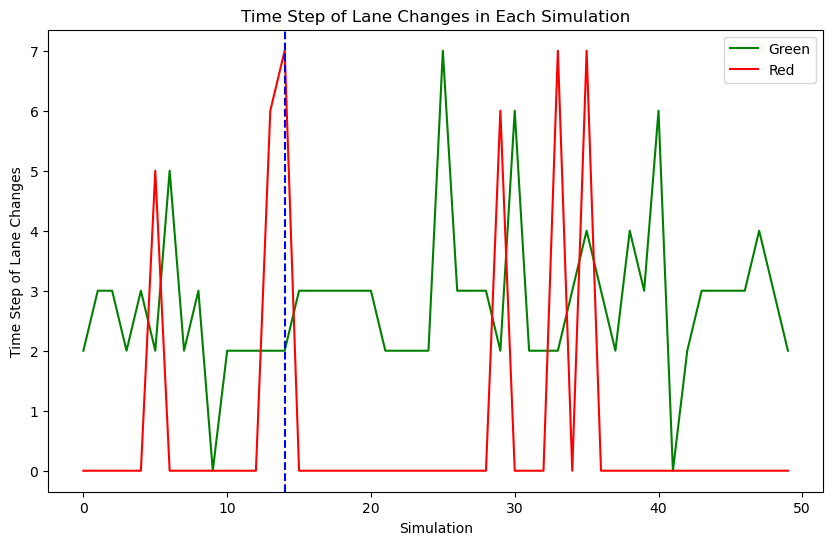

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(green_lane_time, color='green', label='Green')
plt.plot(red_lane_time, color='red', label='Red')
for x in crashed_sim:
    plt.axvline(x=x, linestyle='--', color='blue')
    #plt.text(x+0.5, max(max(green_early_stop), max(red_early_stop)), 'Crashed', color='blue', fontsize=12)

# Adding labels and legend
plt.xlabel('Simulation')
plt.ylabel('Time Step of Lane Changes')
plt.title('Time Step of Lane Changes in Each Simulation')
plt.legend()

# Show plot
plt.show()

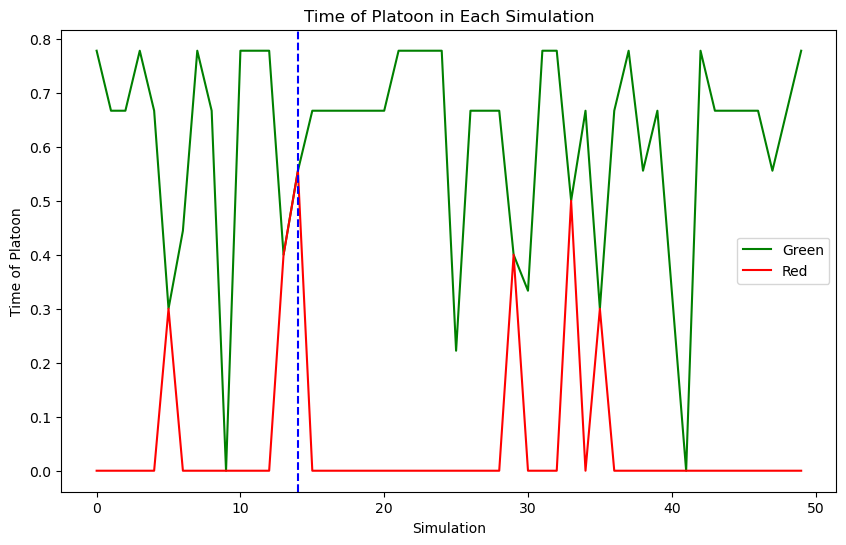

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(green_platoon, color='green', label='Green')
plt.plot(red_platoon, color='red', label='Red')
for x in crashed_sim:
    plt.axvline(x=x, linestyle='--', color='blue')
    #plt.text(x+0.5, max(max(green_early_stop), max(red_early_stop)), 'Crashed', color='blue', fontsize=12)

# Adding labels and legend
plt.xlabel('Simulation')
plt.ylabel('Time of Platoon')
plt.title('Time of Platoon in Each Simulation')
plt.legend()

# Show plot
plt.show()

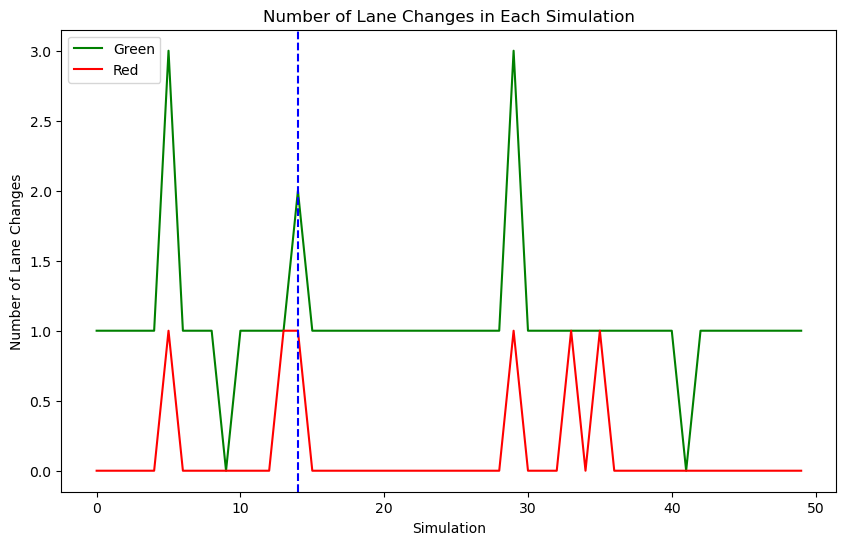

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(green_stop, color='green', label='Green')
plt.plot(red_stop, color='red', label='Red')
for x in crashed_sim:
    plt.axvline(x=x, linestyle='--', color='blue')
    #plt.text(x+0.5, max(max(green_stop), max(red_stop)), 'Crashed', color='blue', fontsize=12)

# Adding labels and legend
plt.xlabel('Simulation')
plt.ylabel('Number of Lane Changes')
plt.title('Number of Lane Changes in Each Simulation')
plt.legend(loc='upper left')

# Show plot
plt.show()

In [ ]:
# Early stop(not in 4,5 or 5,4)
# Stop before intersection(in 4,5 or 5,4)

# Success rate
# Cumulative reward after each simulation

# With bg
# Success rate

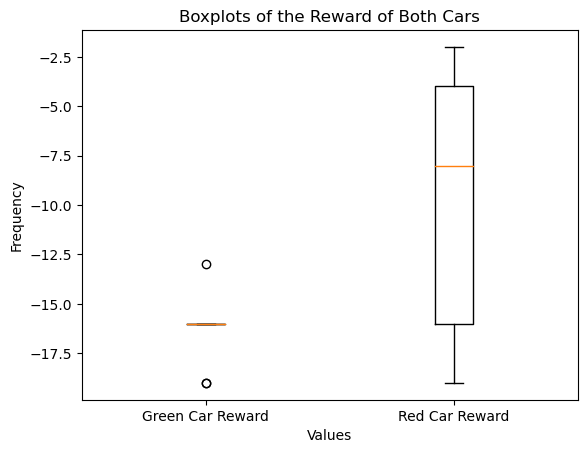

In [30]:
plt.boxplot([green_reward, red_reward], labels=['Green Car Reward', 'Red Car Reward'])

# Adding labels and legend
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Boxplots of the Reward of Both Cars')

# Show plot
plt.show()

In [31]:
red_early_stop[5]

0

In [11]:
crashed_sim

[]